In [ ]:
!pip install --quiet langchain langchain_community langchain-openai langchain-experimental neo4j py2neo openai tiktoken

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 30.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.2/209.2 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 312.3/312.3 kB 16.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.2/177.2 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 18.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 2.3 MB/s eta 0:00:00


In [ ]:
from langchain_openai import AzureChatOpenAI

In [ ]:
pip install -U :class:`~langchain-openai

/bin/bash: -c: line 1: unexpected EOF while looking for matching ``'
/bin/bash: -c: line 2: syntax error: unexpected end of file


In [ ]:
pip install json-repair

In [ ]:
pip install -U langchain langchain-openai

In [ ]:
# 1. Install dependencies
!pip install -q langchain-openai langchain-experimental langchain-community neo4j pandas tqdm

In [ ]:
from tqdm.auto import tqdm
tqdm.pandas()

In [ ]:
!pip install tqdm

In [ ]:
import io
import pandas as pd
df = pd.read_excel('/content/Synthetic_Dataset_0411 3.xlsx')

Azure Setup

In [ ]:
# 3. Set up Azure OpenAI client
import os
from langchain_openai import AzureChatOpenAI

os.environ["AZURE_OPENAI_API_KEY"]       = "CGovkeIlaBZW0ZxDj7PxwwAKGcbmHaa9IHuIHhlpl11wWG2uiclUJQQJ99BBACYeBjFXJ3w3AAABACOGuRYX"
os.environ["AZURE_OPENAI_ENDPOINT"]      = "https://llm-data-quality.openai.azure.com/"
os.environ["AZURE_OPENAI_DEPLOYMENT"]    = "gpt-4o"
os.environ["AZURE_OPENAI_API_VERSION"]   = "2024-08-01-preview"

In [ ]:
llm = AzureChatOpenAI(
    azure_endpoint=os.environ["AZURE_OPENAI_ENDPOINT"],
    azure_deployment=os.environ["AZURE_OPENAI_DEPLOYMENT"],
    api_key=os.environ["AZURE_OPENAI_API_KEY"],
    api_version=os.environ["AZURE_OPENAI_API_VERSION"],
    temperature=0.0
)

# Quick test
try:
    resp = llm.invoke([{"role":"system","content":"Ping"}])
    print("✅ LLM OK", resp)
except Exception as e:
    print("❌ LLM failed:", e)

✅ LLM OK content='Hello! How can I assist you today?' additional_kwargs={'refusal': None} response_metadata={'token_usage': {'completion_tokens': 10, 'prompt_tokens': 8, 'total_tokens': 18, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-11-20', 'system_fingerprint': 'fp_ee1d74bde0', 'id': 'chatcmpl-BR7q5GG2luSMNU5BqciA8ZVvYkbKu', 'prompt_filter_results': [{'prompt_index': 0, 'content_filter_results': {}}], 'finish_reason': 'stop', 'logprobs': None, 'content_filter_results': {'hate': {'filtered': False, 'severity': 'safe'}, 'protected_material_code': {'filtered': False, 'detected': False}, 'protected_material_text': {'filtered': False, 'detected': False}, 'self_harm': {'filtered': False, 'severity': 'safe'}, 'sexual': {'filtered': False, 'severity': 'safe'}, 'violence': {'filtered': False, 'severity': 's

#LLM Code

In [ ]:
# Cell 4: Define the combined detector (plaintext output)
ERROR_PROMPT = """
You are a data-quality assistant. Given the text below, detect two issues:

1. Semantic Misalignment:
   • Misunderstanding product function/use
   • Misinterpretation of technical terms
   • Confusion between categories

2. Specialized Error:
   • Factually incorrect technical specs or usage limits
   • Unsafe or unsupported usage scenarios
   • Misleading performance claims

Examples:
 a. Charging at 50°C → unsafe battery conditions
 b. Using 12V battery on 18V tool → unsupported hack
 c. Claiming “80 Nm on any screw” → overstated torque

Return your answer in plain text EXACTLY like:
"misaligned": true|false,
"specialized_error": true|false,
"explanation": "<brief explanation>"

Here is the text:
"""

def detect_errors(text: str) -> dict:
    content = llm.invoke([
        {"role":"system", "content":"You classify text quality issues."},
        {"role":"user",   "content": ERROR_PROMPT + text}
    ]).content.strip()

    # extract the two flags and the explanation
    m1 = re.search(r'"misaligned":\s*(true|false)',         content)
    m2 = re.search(r'"specialized_error":\s*(true|false)',  content)
    m3 = re.search(r'"explanation":\s*"([^"]+)"',           content)

    return {
        "misaligned":       (m1.group(1) == "true")  if m1 else False,
        "specialized_error":(m2.group(1) == "true")  if m2 else False,
        "explanation":      m3.group(1)              if m3 else content
    }

In [ ]:
# Classify each review into a single label + explanation
import time
def classify_review(text: str) -> pd.Series:
    r = detect_errors(text)
    if r["specialized_error"]:
        label = "Specialized Error"
    elif r["misaligned"]:
        label = "Semantic Misalignment"
    else:
        label = "Clean"
    #Adding a delay of 3 second between API calls
    time.sleep(3)
    return pd.Series({"Predicted_Error": label, "Explanation": r["explanation"]})

df[["Predicted_Error","Explanation"]] = df["Review"].progress_apply(classify_review)

  0%|          | 0/132 [00:00<?, ?it/s]

In [ ]:
# Cell 6: Reorder columns & inspect
df = df[
    ["Product_ID", "Product_Name", "Category",
     "Review", "Review_Date", "Error_Type",
     "Predicted_Error", "Explanation"]
]
df.head()

,Product_ID,Product_Name,Category,Review,Review_Date,Error_Type,Predicted_Error,Explanation
0,GSH18V-5,GSH18V-5L PROFESSIONAL,Hammer,This Bosch SDS-max hammer delivers incredible ...,2025-03-12,Clean,Clean,The text accurately describes the product's fu...
1,GSH18V-5,GSH18V-5L PROFESSIONAL,Hammer,Love the power and portability—running on an 1...,2025-01-23,Clean,Clean,The text does not exhibit semantic misalignmen...
2,GSH18V-5,GSH18V-5L PROFESSIONAL,Hammer,Excellent performance even in cold weather. Wo...,2024-12-03,Clean,Clean,The text does not exhibit semantic misalignmen...
3,GSH18V-5,GSH18V-5L PROFESSIONAL,Hammer,Compact design and powerful impact energy. The...,2025-02-10,Clean,Clean,The text accurately describes the product's fe...
4,GSH18V-5,GSH18V-5L PROFESSIONAL,Hammer,Great tool for demolition inside tight spaces....,2025-04-02,Clean,Clean,The text does not contain any semantic misalig...


In [ ]:
#Save your results
df.to_excel("semantic_and_contextual_errors.xlsx", index=False)
print("✅ Saved to semantic_and_contextual_errors.xlsx")

✅ Saved to semantic_and_contextual_errors.xlsx


#Classification report

In [ ]:
import pandas as pd

df = pd.read_excel('/content/semantic_and_contextual_errors-3.xlsx')
print(df.head())

  Product_ID            Product_Name Category  \
0   GSH18V-5  GSH18V-5L PROFESSIONAL   Hammer   
1   GSH18V-5  GSH18V-5L PROFESSIONAL   Hammer   
2   GSH18V-5  GSH18V-5L PROFESSIONAL   Hammer   
3   GSH18V-5  GSH18V-5L PROFESSIONAL   Hammer   
4   GSH18V-5  GSH18V-5L PROFESSIONAL   Hammer   

                                              Review Review_Date Error_Type  \
0  This Bosch SDS-max hammer delivers incredible ...  2025-03-12      Clean   
1  Love the power and portability—running on an 1...  2025-01-23      Clean   
2  Excellent performance even in cold weather. Wo...  2024-12-03      Clean   
3  Compact design and powerful impact energy. The...  2025-02-10      Clean   
4  Great tool for demolition inside tight spaces....  2025-04-02      Clean   

  Predicted_Error                                        Explanation  
0           Clean  The text accurately describes the product's fu...  
1           Clean  The text does not exhibit semantic misalignmen...  
2           Clean

In [ ]:
df = df.rename(columns={"Error_Type": "Actual_Error"})
print(df.columns.tolist())

['Product_ID', 'Product_Name', 'Category', 'Review', 'Review_Date', 'Actual_Error', 'Predicted_Error', 'Explanation']


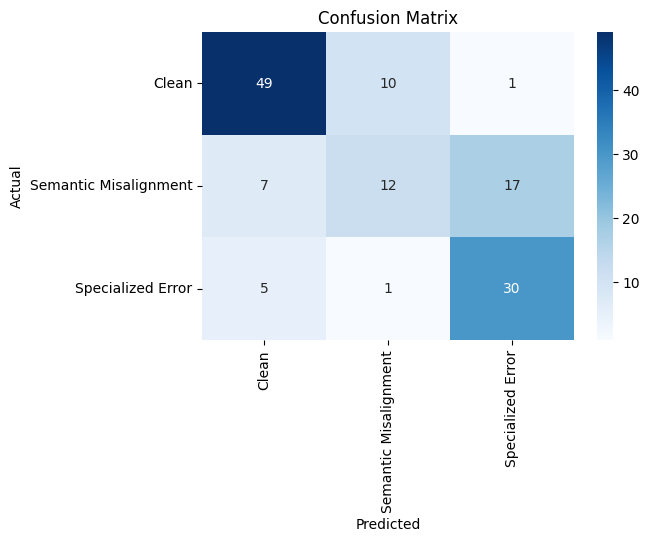

Accuracy: 0.689

Classification Report:
                        precision    recall  f1-score   support

                Clean       0.80      0.82      0.81        60
Semantic Misalignment       0.52      0.33      0.41        36
    Specialized Error       0.62      0.83      0.71        36

             accuracy                           0.69       132
            macro avg       0.65      0.66      0.64       132
         weighted avg       0.68      0.69      0.67       132



In [ ]:
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

y_true = df["Actual_Error"]
y_pred = df["Predicted_Error"]

# 2. Define the order of classes so matrix axes align:
labels = ["Clean", "Semantic Misalignment", "Specialized Error"]

# 3. Compute confusion matrix (raw counts):
cm = confusion_matrix(y_true, y_pred, labels=labels)

# 4. Display it as a heatmap for readability:
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=labels, yticklabels=labels)
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.title("Confusion Matrix")
plt.show()

# 5. Compute overall accuracy:
acc = accuracy_score(y_true, y_pred)
print(f"Accuracy: {acc:.3f}\n")

# 6. Generate detailed per-class metrics:
report = classification_report(y_true, y_pred, labels=labels, zero_division=0)
print("Classification Report:\n", report)

In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score

labels = ["Clean", "Semantic Misalignment", "Specialized Error"]

for label in labels:
    # select only the rows where the actual label is `label`
    mask = df["Actual_Error"] == label

    # compute accuracy on that subset
    acc = accuracy_score(
        df.loc[mask, "Actual_Error"],
        df.loc[mask, "Predicted_Error"]
    )
    print(f"{label:22s} accuracy: {acc:.3f}  (n={mask.sum()})")

Clean                  accuracy: 0.817  (n=60)
Semantic Misalignment  accuracy: 0.333  (n=36)
Specialized Error      accuracy: 0.833  (n=36)
